# Physics 240, Spring 2020: First Notebook

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from numba import jit

We'll demonstrate a few of the features of python and of Jupyter notebooks here.  We will generate random numbers 

$x \in (0, 1)$

and then compute 

$y = \sin(x)$.

We'll write two functions to do this on an array.  One will operate on the entire array, while the other operates element-by-element.  We'll further duplicate this second function, adding a jit decorator for comparison.

In [2]:
def fastsine(x):
    return np.sin(x)

def slowsine(x):
    y = np.zeros(x.shape)
    for i in range(len(x)):
        y[i] = np.sin(x[i])
    return y

@jit
def jitsine(x):
    y = np.zeros(x.shape)
    for i in range(len(x)):
        y[i] = np.sin(x[i])
    return y

Now we'll run each on an array of $10^6$ random elements and time them.  I'll note that when I write these same lines into a program run from the command line, fastsine performs significantly better (I don't know why).

In [3]:
n = 1000000
x = np.random.rand(n)

In [4]:
%timeit fastsine(x)

17.7 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%timeit jitsine(x)

24.8 ms ± 4.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit slowsine(x)

1.76 s ± 340 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Now we'll show how to make a few simple plots.  These examples are only intended to show you how to make 1D and 2D plots within a notebook and to demonstrate a few of the most basic arguments.  You can use google to find many more examples and explanations of other keywords you might want or need.

Text(0, 0.5, 'y value')

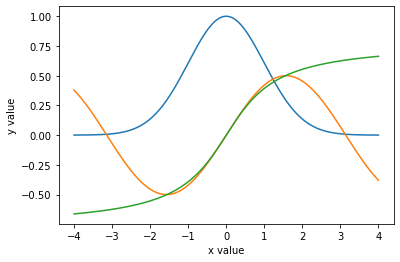

In [7]:
# Here, linspace makes an equally spaced array with 1001 elements between -4 and 4 (inclusive).
x = np.linspace(-4, 4, 1001)
plt.plot(x, np.exp(-x**2/2.))
plt.plot(x, 0.5*np.sin(x))
plt.plot(x, 0.5*np.arctan(x))
plt.xlabel("x value")
plt.ylabel("y value")

Text(0, 0.5, 'Y value')

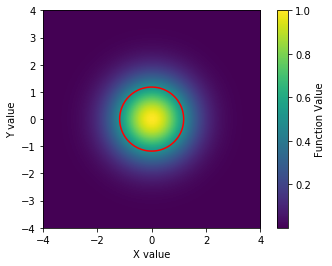

In [8]:
x = np.linspace(-4, 4, 1001)
# Meshgrid makes two 1001x1001 arrays, one with the x values and one with the y values.
x, y = np.meshgrid(x, x)
fval = np.exp(-(x**2 + y**2)/2.)

# Make a color plot, extent gives limits on axes.  Then add a colorbar.
plt.imshow(fval, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar(label='Function Value')
# Add a red contour at a function value of 0.5.  Need extent to match imshow!
plt.contour(fval, [0.5], colors=['red'], extent=[x.min(), x.max(), y.min(), y.max()])
plt.xlabel("X value")
plt.ylabel("Y value")
